# Fit beta distributions to the simulations
This will require monitoring and quality control and thus an interactive approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py

import os, sys
rootpath = os.path.join(os.getcwd(), '.')
sys.path.append(rootpath)
from src.analysis import *
# reimport modules if they change
%load_ext autoreload
%autoreload 2

In [2]:
file_beta = './dat/beta_approximation_simulation.h5'
# TODO: API is not really human readable yet. Maybe a database/dataframe would be more appropriate? Maybe SQLlite?
# seed!!!

In [3]:
params = {
    'N': int(1e4),
    'K': 100,
    'mu': 0.02
}
root='./dat/N={N}_K={K}/'.format(**params)
print("system setup:",root)

# get lambda values by iterating over directory and splitting on '='
lambda_dirs = os.listdir(root)
lambdas = [1-float(dir.split("=")[-1]) for dir in  lambda_dirs]
print("available lambda values:")
print(lambdas)

system setup: ./dat/N=10000_K=100/
available lambda values:
[0.9]


## Select a lambda for supervised analysis

In [4]:
lambda_= 0.9

In [5]:
# make a pandas dataframe with all the data that will be stored in global hdf5 file if quality checks pass
import pandas as pd
df = pd.DataFrame(columns=['window','lambda','h','a','b','loc','scale','mean_data', 'mean_approx'])

In [6]:
print("loading data for lambda={}".format(lambda_))
path=root+lambda_dirs[lambdas==lambda_]
filenames=os.listdir(path)
hs = [float(filename.split("_")[-2].split("=")[-1]) for filename in filenames]
# sort filenames and h by h
hs, filenames = zip(*sorted(zip(hs, filenames)))
print("path:", path)
# print filenames as a list
print(f"files ({len(filenames)}):")
for (h, filename) in zip(hs, filenames):
    print(f'{h:.2e}\t {filename}')

loading data for lambda=0.9
path: ./dat/N=10000_K=100/1-lambda=1.00e-01
files (11):
1.00e-04	 simulation_mu=0.20_h=1.00e-04_seed=1000.h5
3.16e-04	 simulation_mu=0.20_h=3.16e-04_seed=1000.h5
1.00e-03	 simulation_mu=0.20_h=1.00e-03_seed=1000.h5
3.16e-03	 simulation_mu=0.20_h=3.16e-03_seed=1000.h5
1.00e-02	 simulation_mu=0.20_h=1.00e-02_seed=1000.h5
3.16e-02	 simulation_mu=0.20_h=3.16e-02_seed=1000.h5
1.00e-01	 simulation_mu=0.20_h=1.00e-01_seed=1000.h5
3.16e-01	 simulation_mu=0.20_h=3.16e-01_seed=1000.h5
1.00e+00	 simulation_mu=0.20_h=1.00e+00_seed=1000.h5
3.16e+00	 simulation_mu=0.20_h=3.16e+00_seed=1000.h5
1.00e+01	 simulation_mu=0.20_h=1.00e+01_seed=1000.h5


[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	1.50e+00,5.01e+03,-0.0001,1.0002,0.00029841273966665016,0.00019843799999999997
1.0	1.64e+00,5.48e+03,-0.0001,1.0002,0.0002984104896507469,0.00019843733731732396
10.0	2.86e+00,9.60e+03,-0.0001,1.0002,0.0002983658143050147,0.0001984031477629585
100.0	1.17e+01,3.92e+04,-0.0001,1.0002,0.0002982955159332992,0.00019834062199795895
1000.0	7.85e+01,2.63e+05,-0.0001,1.0002,0.00029841413114709665,0.00019845973791332244
10000.0	2.30e+02,7.88e+05,-0.0001,1.0002,0.00029107549761589376,0.0001911196360940076


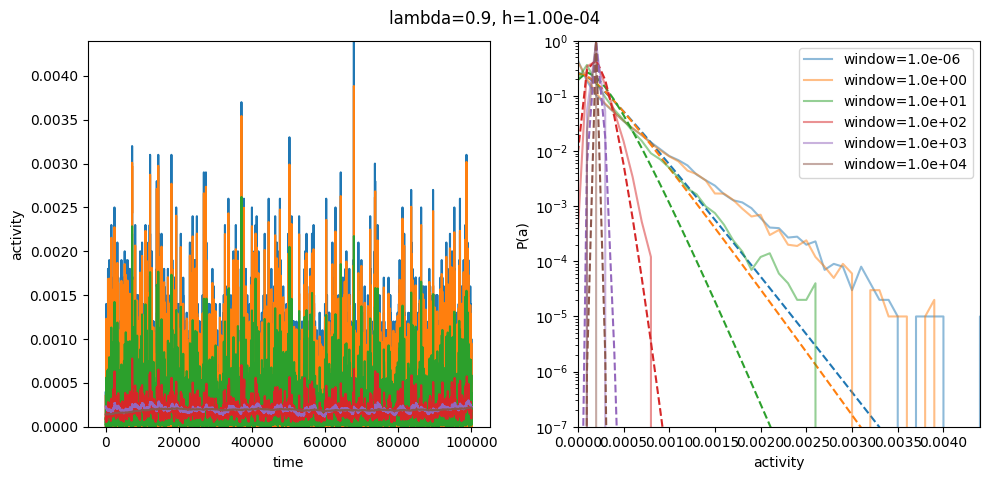

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	1.76e+00,2.42e+03,-0.0001,1.0002,0.0007274280260080775,0.000627544
1.0	1.98e+00,2.72e+03,-0.0001,1.0002,0.0007274334726962831,0.0006275463675474709
10.0	3.85e+00,5.29e+03,-0.0001,1.0002,0.0007274488280971025,0.0006275672409865819
100.0	1.94e+01,2.66e+04,-0.0001,1.0002,0.0007274339189039422,0.0006275642281289179
1000.0	1.74e+02,2.39e+05,-0.0001,1.0002,0.0007280532241201336,0.0006281847602829425
10000.0	5.15e+02,7.18e+05,-0.0001,1.0002,0.0007162217477424547,0.0006163509271160724


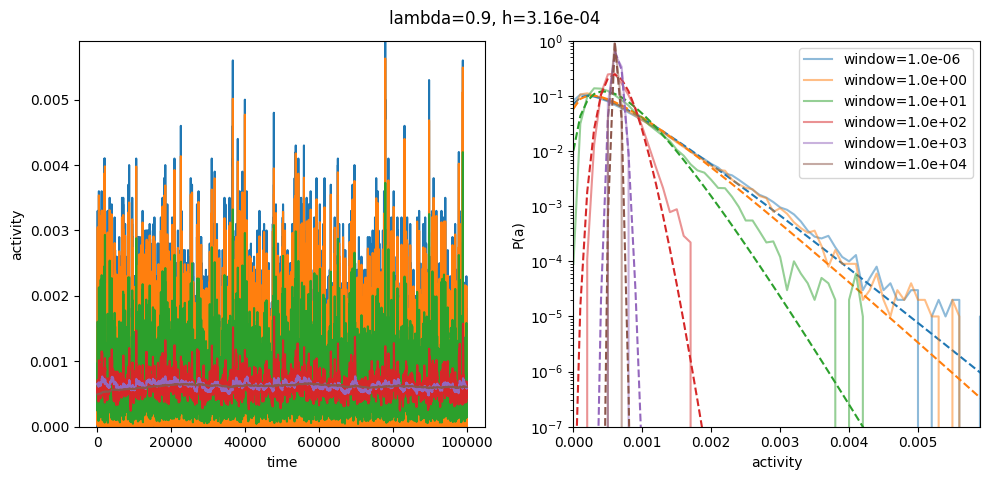

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.12e+00,1.98e+03,-0.0001,1.0002,0.0020717759382361646,0.0019721849999999996
1.0	4.56e+00,2.20e+03,-0.0001,1.0002,0.002071786442501953,0.001972186286116717
10.0	9.12e+00,4.39e+03,-0.0001,1.0002,0.00207176620938352,0.001972157439335033
100.0	5.24e+01,2.52e+04,-0.0001,1.0002,0.002071694980625867,0.00197209475366406
1000.0	5.21e+02,2.51e+05,-0.0001,1.0002,0.002073360554087937,0.0019737611301622955
10000.0	1.01e+03,4.79e+05,-0.0001,1.0002,0.00209942655769699,0.001999832284900933


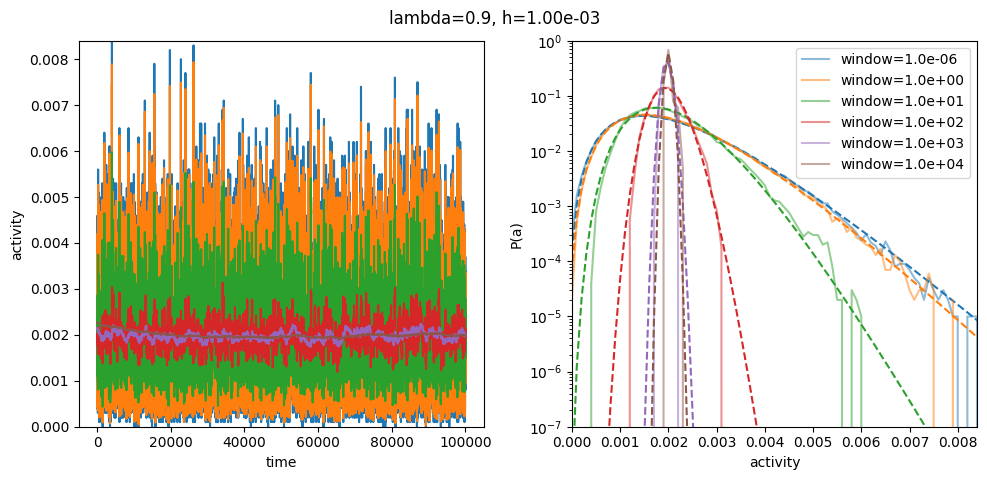

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	1.24e+01,1.92e+03,-0.0001,1.0002,0.006377191689407717,0.006278464999999999
1.0	1.35e+01,2.10e+03,-0.0001,1.0002,0.006377180027537196,0.006278444387613663
10.0	2.58e+01,4.02e+03,-0.0001,1.0002,0.006376913830787728,0.006278164205635285
100.0	1.45e+02,2.26e+04,-0.0001,1.0002,0.00637588716183956,0.006277146797264867
1000.0	1.44e+03,2.24e+05,-0.0001,1.0002,0.006377752058370004,0.006279013499796358
10000.0	1.08e+04,1.68e+06,-0.0001,1.0002,0.006392128613891328,0.006293392964013418


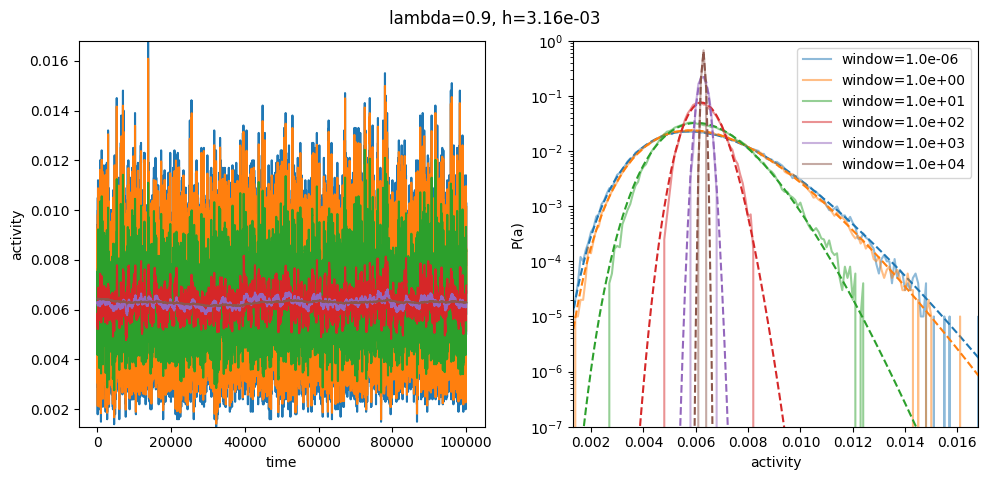

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	3.80e+01,1.90e+03,-0.0001,1.0002,0.01960835294639117,0.019512280000000003
1.0	4.14e+01,2.07e+03,-0.0001,1.0002,0.019608326511571288,0.01951224475917987
10.0	7.94e+01,3.97e+03,-0.0001,1.0002,0.019608058875704965,0.01951195861080373
100.0	4.63e+02,2.31e+04,-0.0001,1.0002,0.0196074242481432,0.019511330902244998
1000.0	3.72e+03,1.86e+05,-0.0001,1.0002,0.01960697839832616,0.019510885625952015
10000.0	2.24e+04,1.12e+06,-0.0001,1.0002,0.01967343725884491,0.019577357814314668


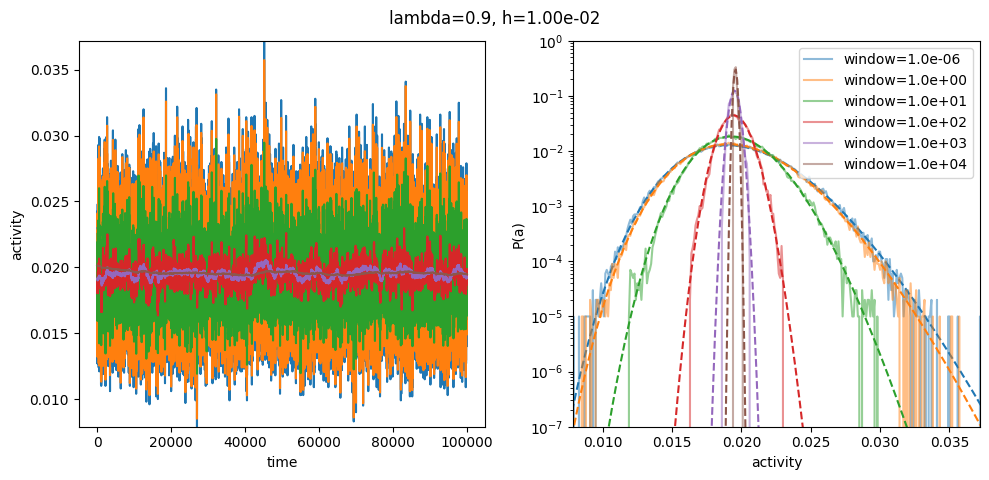

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	1.18e+02,1.88e+03,-0.0001,1.0002,0.0589374728497881,0.058849261
1.0	1.28e+02,2.05e+03,-0.0001,1.0002,0.0589375168670937,0.05884929792984498
10.0	2.45e+02,3.91e+03,-0.0001,1.0002,0.05893822396565437,0.058849989122263226
100.0	1.39e+03,2.22e+04,-0.0001,1.0002,0.05893735737179087,0.05884913196482246
1000.0	1.16e+04,1.85e+05,-0.0001,1.0002,0.05892695310154983,0.05883872427624833
10000.0	5.69e+04,9.11e+05,-0.0001,1.0002,0.05882935684653618,0.05874110873027318


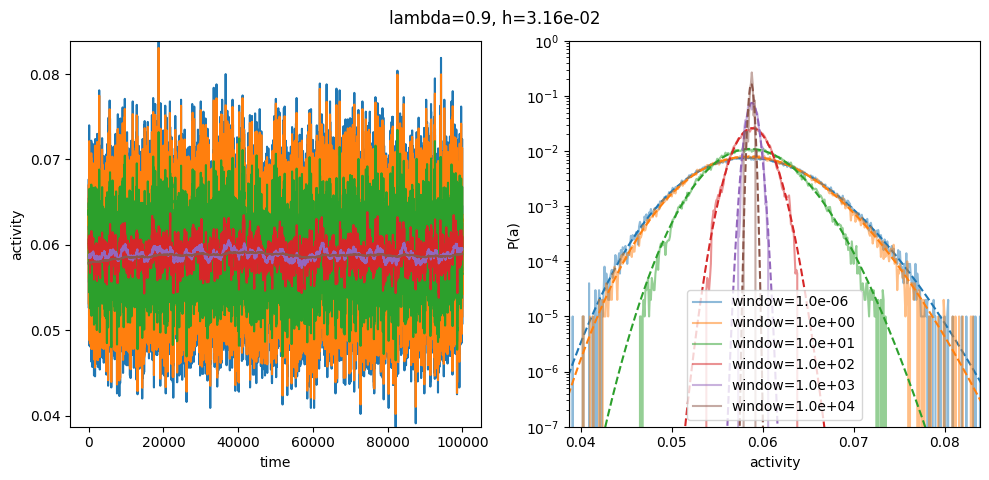

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	3.60e+02,1.85e+03,-0.0001,1.0002,0.1624136404560713,0.162346143
1.0	3.96e+02,2.04e+03,-0.0001,1.0002,0.16241367255823122,0.162346171104198
10.0	8.01e+02,4.13e+03,-0.0001,1.0002,0.16241450858556544,0.16234699329512542
100.0	4.71e+03,2.43e+04,-0.0001,1.0002,0.16241522909646758,0.16234769909788435
1000.0	4.28e+04,2.21e+05,-0.0001,1.0002,0.1624049242895688,0.16233739107237566
10000.0	3.58e+04,1.85e+05,-0.0001,1.0002,0.16204782838507764,0.1619802265070524


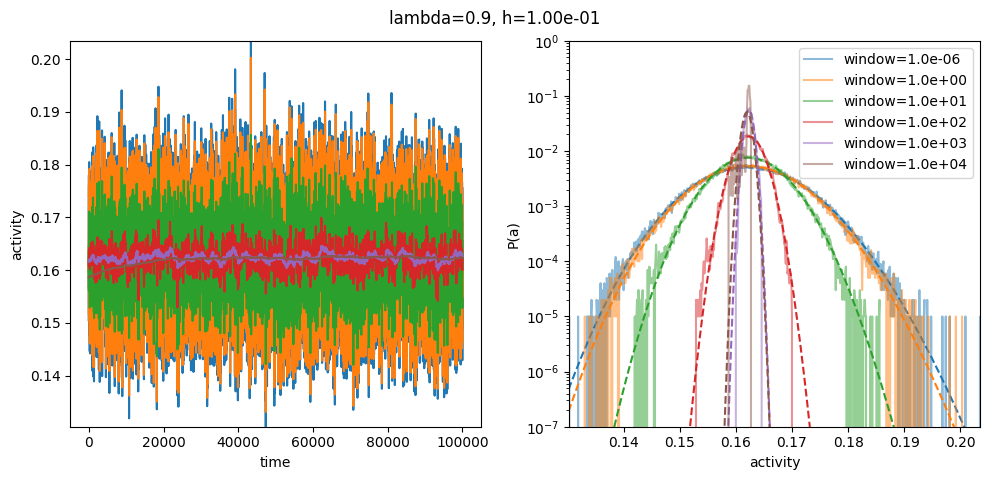

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	1.03e+03,1.80e+03,-0.0001,1.0002,0.36431367634141254,0.364286555
1.0	1.17e+03,2.04e+03,-0.0001,1.0002,0.3643135646878491,0.3642864382962223
10.0	2.68e+03,4.67e+03,-0.0001,1.0002,0.3643125974844246,0.364285456331383
100.0	1.68e+04,2.93e+04,-0.0001,1.0002,0.36431168678065534,0.36428453561968754
1000.0	1.84e+05,3.20e+05,-0.0001,1.0002,0.36430692335127207,0.3642797706886071
10000.0	2.58e+05,4.51e+05,-0.0001,1.0002,0.3640371025106217,0.364009896523309


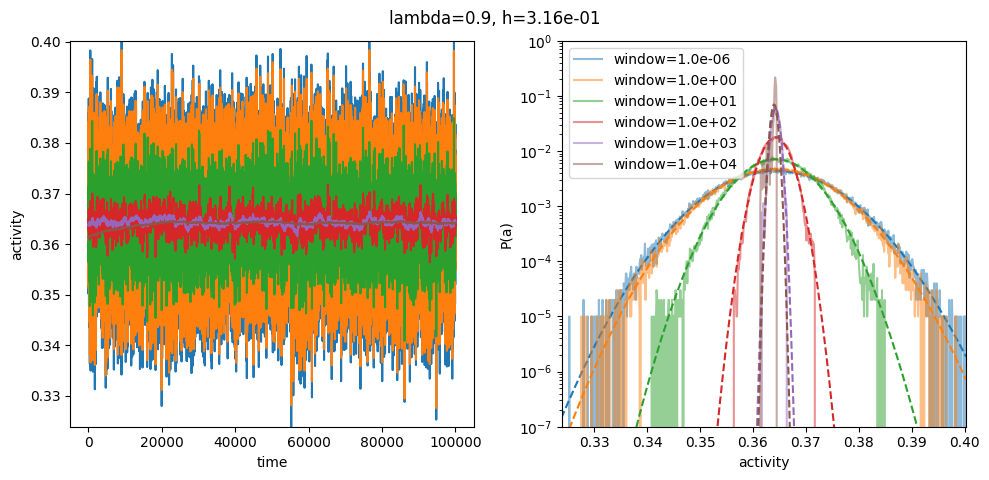

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	2.41e+03,1.67e+03,-0.0001,1.0002,0.5911609001632244,0.591179119
1.0	2.88e+03,1.99e+03,-0.0001,1.0002,0.5911608975961126,0.5911791174336565
10.0	8.26e+03,5.72e+03,-0.0001,1.0002,0.5911612733677801,0.5911794924730929
100.0	6.12e+04,4.23e+04,-0.0001,1.0002,0.5911593743404188,0.5911775925275605
1000.0	6.92e+05,4.79e+05,-0.0001,1.0002,0.5911524259293643,0.591170642302074
10000.0	6.96e+05,4.82e+05,-0.0001,1.0002,0.5909243115480136,0.5909424826896106


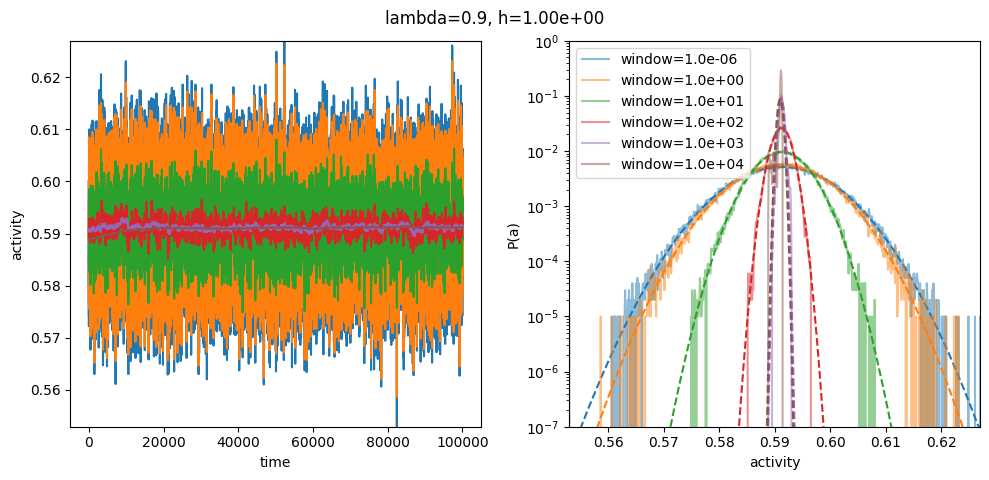

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	3.67e+03,1.55e+03,-0.0001,1.0002,0.7029693067453597,0.7030098889999999
1.0	4.58e+03,1.94e+03,-0.0001,1.0002,0.7029693101658987,0.7030098938821492
10.0	1.51e+04,6.36e+03,-0.0001,1.0002,0.7029696656153512,0.7030102464725937
100.0	1.25e+05,5.29e+04,-0.0001,1.0002,0.7029681962690667,0.7030087760189941
1000.0	1.51e+06,6.40e+05,-0.0001,1.0002,0.7029651331276602,0.7030057120806026
10000.0	8.27e+05,3.50e+05,-0.0001,1.0002,0.7027583664372465,0.70279890433263


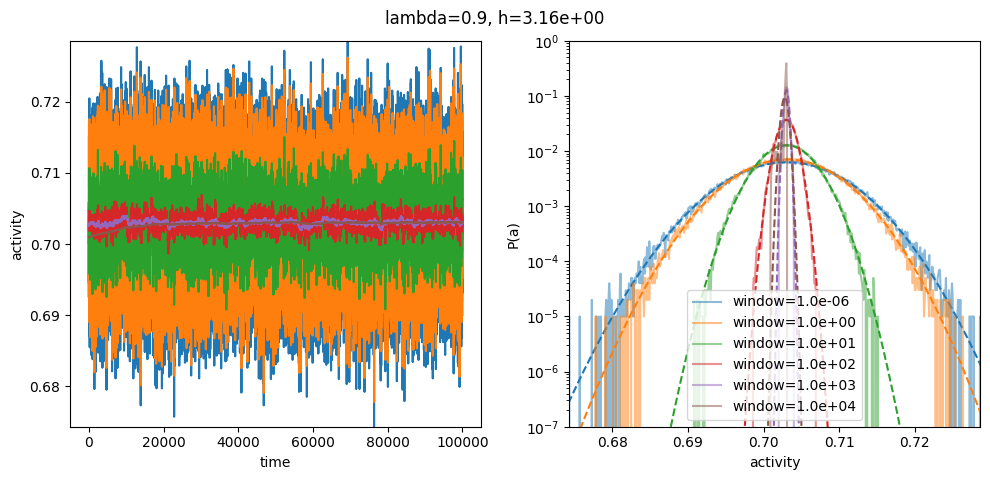

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	3.83e+03,1.53e+03,-0.0001,1.0002,0.7140571651354428,0.714099966
1.0	4.81e+03,1.93e+03,-0.0001,1.0002,0.7140571689245281,0.7140999713254997
10.0	1.61e+04,6.44e+03,-0.0001,1.0002,0.7140574660759594,0.714100265015278
100.0	1.34e+05,5.38e+04,-0.0001,1.0002,0.7140557602053048,0.7140985574756333
1000.0	1.61e+06,6.46e+05,-0.0001,1.0002,0.7140522267189554,0.7140950338492928
10000.0	1.54e+06,6.18e+05,-0.0001,1.0002,0.7139066672639529,0.7139494346274213


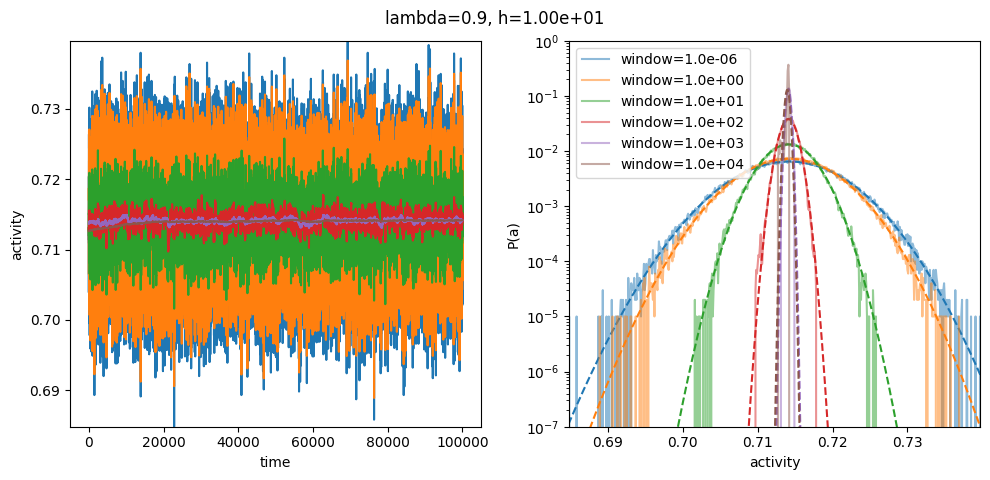

In [7]:
for (h,file) in zip(hs, filenames):
    filename = path+'/'+file

    # make figures for quality check
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    range_data = [1,0]

    # open hdf5 file
    with h5py.File(filename, 'r') as file:
        N = file.attrs['N']
        lambda_ = file.attrs['lambda']
        h=file.attrs['h']
        # set title in center of figure
        title_str = f'lambda={lambda_}, h={h:.2e}'
        fig.suptitle(title_str, y=.95)
        # windows
        windows = np.array(file['windows'])
        print(windows)
        for (i,window) in enumerate(windows):
            data = np.array(file['samples'][f'{window}'])
            axes[0].plot(data)
            delta = 1/N
            support = np.linspace(0,1,N+1)
            pmf_data = np.histogram(data, bins=np.append(support,1+delta)-delta/2, density=False)[0]/len(data)
            ref = axes[1].plot(support, pmf_data, label=f'window={windows[i]:.1e}', alpha=0.5)
            # fit beta distribution
            a,b,loc,scale = fit_beta_distribution(data, delta)
            # add result to hdf5 file
            with h5py.File(file_beta, 'a') as out:
                dset = f'{window}/{lambda_}/{h}'
                if dset in out:
                    del out[dset]
                out.create_dataset(dset, data=np.array([a,b,loc,scale, a/(a+b), np.mean(data)]))            

            print(f'{window}\t{a:.2e},{b:.2e},{loc},{scale},{a/(a+b)},{np.mean(data)}')
            pmf_beta = stats.beta.pdf(support, a,b, loc=loc, scale=scale)
            pmf_beta = pmf_beta/np.sum(pmf_beta)
            axes[1].plot(support,pmf_beta, color=ref[0].get_color(), linestyle='--')

            range_data[0] = min(range_data[0], support[np.nonzero(pmf_data)][0])
            range_data[1] = max(range_data[1], support[np.nonzero(pmf_data)][-1])

    axes[0].set_xlabel('time')
    axes[0].set_ylabel('activity')
    axes[1].set_xlabel('activity')
    axes[1].set_ylabel('P(a)')
    # set xrange to range of data
    axes[1].set_yscale('log')
    axes[1].set_ylim([1e-7,1])
    axes[1].set_xlim(range_data)
    axes[0].set_ylim(range_data)
    axes[1].legend()
    plt.tight_layout()
    plt.show()